<a href="https://colab.research.google.com/github/ashanthamara/Machine-Vision/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from typing import Tuple
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Question (a) - Load data 

In [ ]:
import numpy as np
from typing import Tuple

def load_dataset(
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
  """Load the dataset as a set of numpy arrays.
  Args:
    src_dir: Directory where dataset files are stored.
  Returns:
    (x_train, y_train, x_val, y_val, x_test) tuple where each array is 
    one dimensional.
  """
  # Implement here.
  x_train = np.loadtxt('x_train.txt')
  y_train = np.loadtxt('y_train.txt')
  x_val   = np.loadtxt('x_val.txt')
  y_val   = np.loadtxt('y_val.txt')
  x_test  = np.loadtxt('x_test.txt')

  return (x_train, y_train, x_val, y_val, x_test)

In [ ]:
files = load_dataset()

# Question (b) - (i) - Get Features

In [ ]:
def get_features(x: np.ndarray, n: int) -> np.ndarray:
  """Creates n-th degree polynomial features for the given vector x.
  
  Example usage:
  get_features(np.array([1.0, 2.0, 3.0]), 3) outputs
  np.array([[ 1., 1., 1.],
            [ 2., 4., 8.],
            [ 3., 9., 27.]])
  
  Args:
    x: A numpy array of shape (num_examples, ) or (num_examples, 1).
    n: The degree of the polynomial features.
  Returns:
    A matrix of shape (num_examples, n) where the j-th column is equal to
    the vector x raised to the power j (elementwise).
  """
  # Implement here.
  feature_arr = []

  for order in range(1, n+1):
    feature_arr.append(np.power(x, order))

  feature_np_arr = np.transpose(np.array(feature_arr))

  return feature_np_arr

# Question (b) - (ii) - Fit to the Model

In [ ]:
def mse(
    y_predict: np.ndarray, y: np.ndarray
) -> np.ndarray:
    """Give the Minimum Square Error between 2 numpy arrays.
    
    Args:
      y_predict : Predicted y data set
      y         : y data set
    
    Returns:
      Minimum Square Error value.
    """  
    diff    = np.subtract(y_predict, y)
    square  = np.square(diff)
    mse     = square.mean()

    return mse

In [ ]:
from sklearn.linear_model import LinearRegression

def fit_and_evaluate(
        x_train: np.ndarray, y_train: np.ndarray,
        x_val: np.ndarray, y_val: np.ndarray,
        n: int
) -> Tuple[float, float]:
  """Fits an n-th degree polynomial and outputs train and validation MSE.
  
  Fits a linear regression model y = sum_{i=1}^n w_i x^i to the given train
  set and outputs the mean-squared-error (MSE) on train and validation sets.
  
  Args:
    x_train: Input features for the train set. Has shape (num_train, )
    y_train: Targets (labels) for the train set. Has shape (num_train, )
    x_val: Input features for the validation set. Has shape (num_val, )
    y_val: Targets (labels) for the validation set. Has shape (num_val, )
    n: The degree of the polynomial fit. See the above equation.
  
  Returns:
    (train_mse, val_mse), tuple of MSE on train and validation sets.
  """
  # Fit the model on the train set.
  features_train = get_features(x_train, n)          	        
  lReg = LinearRegression().fit(features_train, y_train)      

  # Generate model predictions for the train set and calculate the MSE.
  y_predict_train = lReg.predict(features_train)
  train_mse = mse(y_predict_train, y_train)
  
  # Similarly, calculate the MSE on the val set.
  features_val = get_features(x_val, n)
  y_predict_val = lReg.predict(features_val)
  
  val_mse = mse(y_predict_val, y_val)

  return (train_mse, val_mse)

# Question (c) - Execution

In [ ]:
train_mse_list = []
valid_mse_list = []

poly_order_list = range(1,11)

(x_train, y_train, x_val, y_val, x_test) = load_dataset()

for n in poly_order_list:
  train_mse, val_mse = fit_and_evaluate(x_train, y_train, x_val, y_val, n)

  train_mse_list.append(train_mse)
  valid_mse_list.append(val_mse)

print (train_mse_list)
print (valid_mse_list)

[0.009864490094460845, 0.008163153627118627, 0.005981666955568008, 0.0031633621615761386, 0.0027591731286592484, 0.002456559289068863, 0.0024500640867778827, 0.002430787870448915, 0.0023097525840395706, 0.0023060588213539065]
[0.009405234745251631, 0.008328810131910442, 0.005754008631688685, 0.0045703795718866, 0.004725591166898599, 0.005238102521960982, 0.005222963895944109, 0.005062812502113994, 0.005121710255229986, 0.005174772167507077]


# Plotting Data

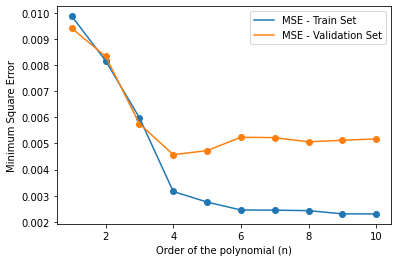

In [ ]:
plt.scatter(poly_order_list, train_mse_list)
plt.plot(poly_order_list, train_mse_list)

plt.scatter(poly_order_list, valid_mse_list)
plt.plot(poly_order_list, valid_mse_list)

plt.xlabel("Order of the polynomial (n)")
plt.ylabel("Minimum Square Error")
plt.legend(["MSE - Train Set", "MSE - Validation Set"])
plt.show()

In [ ]:
print(min(valid_mse_list))
print(valid_mse_list)

0.0045703795718866
[0.009405234745251631, 0.008328810131910442, 0.005754008631688685, 0.0045703795718866, 0.004725591166898599, 0.005238102521960982, 0.005222963895944109, 0.005062812502113994, 0.005121710255229986, 0.005174772167507077]


# Test Set Evaluation

In [ ]:
min_order = 4

# x_set = np.concatenate((x_train, x_val), axis=0)
# y_set = np.concatenate((y_train, y_val), axis=0)

# features = get_features(x_set, min_order)          	        
# lReg = LinearRegression().fit(features, y_set) 

# features_test = get_features(x_test, min_order)
# y_predict_test = lReg.predict(features_test)

# print(y_predict_test)

# print("#################################")

features = get_features(x_train, min_order)          	        
lReg = LinearRegression().fit(features, y_train)

features_test = get_features(x_test, min_order)
y_predict_test = lReg.predict(features_test)

print(y_predict_test)

np.savetxt('170418E_y_predict_test.txt', y_predict_test)

[-0.30878316 -0.30341778 -0.07618281 -0.0843125  -0.10491691 -0.08973922
 -0.11277228 -0.08348989 -0.08202108 -0.02106554 -0.14471697 -0.09272346
 -0.29550722  0.07350912 -0.07189564 -0.29119058 -0.07191468 -0.09032372
 -0.09013063 -0.09104392 -0.09784716  0.02246369 -0.27668916 -0.09052277
 -0.28242122 -0.08619781 -0.16541421 -0.30631398 -0.09794286  0.03249597
 -0.24527463 -0.29235661 -0.24477184 -0.14936501 -0.29526399 -0.31031345
 -0.08006125 -0.07536584 -0.23513394 -0.23883371 -0.30654502 -0.08830308
 -0.01314884 -0.08278867  0.02963719 -0.13621903 -0.07613073 -0.09347038
 -0.08750151 -0.07416437 -0.18264786 -0.24231125 -0.07436302 -0.08141123
 -0.12016509 -0.20322411 -0.28753099 -0.25037422 -0.1379987  -0.25555791
 -0.07525156 -0.12307734 -0.11889327 -0.08982563 -0.25245923 -0.07217565
 -0.0914836  -0.11382828 -0.07189879 -0.28390421 -0.07344621 -0.22602493
 -0.01369172 -0.07375273 -0.2122835  -0.07485047 -0.30696024 -0.0885661
 -0.08996211 -0.07189514 -0.17579746 -0.07574765  0.